
MAO

--- This is a classification problem ---

1. Loading dataset from file...

2. Calculating gram matrices. This could take a while...

calculating kernels:   0%|          | 2/2346.0 [00:00<02:17, 16.99it/s]

../pygraph/kernels/commonWalkKernel.py:168: ComplexWarning: Casting complex values to real discards the imaginary part
  D[i][i] = np.exp(beta * ew[i])
../pygraph/kernels/commonWalkKernel.py:79: ComplexWarning: Casting complex values to real discards the imaginary part
  edge_label, weight)


calculating kernels: 100%|██████████| 2346/2346.0 [09:31<00:00,  4.13it/s]
 --- kernel matrix of common walk kernel of size 68 built in 571.1209850311279 seconds ---

[[ 1.          0.99682307  0.99737306 ...,  0.97765855  0.96593664
   0.92542251]
 [ 0.99682307  1.          0.99795677 ...,  0.98819739  0.97748489
   0.94249778]
 [ 0.99737306  0.99795677  1.         ...,  0.98590615  0.9753702
   0.94038317]
 ..., 
 [ 0.97765855  0.98819739  0.98590615 ...,  1.          0.98685012
   0.961209  ]
 [ 0.96593664  0.97748489  0.9753702  ...,  0.98685012  1.          0.99067559]
 [ 0.92542251  0.94249778  0.94038317 ...,  0.961209    0.99067559  1.        ]]


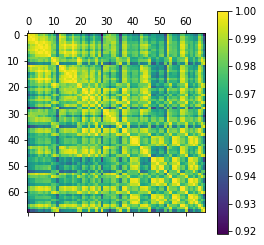


1 gram matrices are calculated, 0 of which are ignored.

3. Fitting and predicting using nested cross validation. This could really take a while...
                                                                           
4. Getting final performances...
best_params_out:  [{}]
best_params_in:  [{'C': 3.1622776601683795}]

best_val_perf:  0.665952380952
best_val_std:  0.0528237368363
final_performance:  0.70619047619
final_confidence:  0.132993644234
train_performance:  0.675101010101
train_std:  0.0302704867371

time to calculate gram matrix with different hyperpapams: 571.12±nan
time to calculate best gram matrix:  571.1209850311279 s

params             train_perf    valid_perf    test_perf      gram_matrix_time
-----------------  ------------  ------------  -----------  ------------------
{'C': '1.00e-10'}  0.56±0.02     0.55±0.05     0.54±0.14                571.12
{'C': '3.16e-10'}  0.56±0.02     0.55±0.05     0.54±0.14                571.12
{'C': '1.00e-09'}  0.56±0.02     0.5

/usr/local/lib/python3.5/dist-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.5/dist-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)



2. Calculating gram matrices. This could take a while...

calculating kernels:   0%|          | 10/180300.0 [00:19<117:40:38,  2.35s/it]

NetworkXError: Graph has no nodes or edges

In [1]:
%load_ext line_profiler
%matplotlib inline
import numpy as np
import sys
sys.path.insert(0, "../")
from pygraph.utils.model_selection_precomputed import model_selection_for_precomputed_kernel
from pygraph.kernels.commonWalkKernel import commonwalkkernel

dslist = [   
#     {'name': 'Acyclic', 'dataset': '../datasets/acyclic/dataset_bps.ds', 'task': 'regression'}, # node_labeled
#     {'name': 'COIL-DEL', 'dataset': '../datasets/COIL-DEL/COIL-DEL_A.txt'}, # edge_labeled
#     {'name': 'PAH', 'dataset': '../datasets/PAH/dataset.ds',}, # unlabeled
#     {'name': 'Mutagenicity', 'dataset': '../datasets/Mutagenicity/Mutagenicity_A.txt'}, # fully_labeled
    {'name': 'MAO', 'dataset': '../datasets/MAO/dataset.ds',},

#     {'name': 'MUTAG', 'dataset': '../datasets/MUTAG/MUTAG.mat',
#         'extra_params': {'am_sp_al_nl_el': [0, 0, 3, 1, 2]}},
#     {'name': 'Alkane', 'dataset': '../datasets/Alkane/dataset.ds', 'task': 'regression', 
#         'dataset_y': '../datasets/Alkane/dataset_boiling_point_names.txt',},
#     {'name': 'BZR', 'dataset': '../datasets/BZR_txt/BZR_A_sparse.txt'},
#     {'name': 'COX2', 'dataset': '../datasets/COX2_txt/COX2_A_sparse.txt'},    
    {'name': 'ENZYMES', 'dataset': '../datasets/ENZYMES_txt/ENZYMES_A_sparse.txt'},
#     {'name': 'DHFR', 'dataset': '../datasets/DHFR_txt/DHFR_A_sparse.txt'},
#     {'name': 'SYNTHETIC', 'dataset': '../datasets/SYNTHETIC_txt/SYNTHETIC_A_sparse.txt'},
#     {'name': 'MSRC9', 'dataset': '../datasets/MSRC_9_txt/MSRC_9_A.txt'},
#     {'name': 'MSRC21', 'dataset': '../datasets/MSRC_21_txt/MSRC_21_A.txt'},
#     {'name': 'FIRSTMM_DB', 'dataset': '../datasets/FIRSTMM_DB/FIRSTMM_DB_A.txt'},

#     {'name': 'PROTEINS', 'dataset': '../datasets/PROTEINS_txt/PROTEINS_A_sparse.txt'},
#     {'name': 'PROTEINS_full', 'dataset': '../datasets/PROTEINS_full_txt/PROTEINS_full_A_sparse.txt'},
#     {'name': 'D&D', 'dataset': '../datasets/D&D/DD.mat',
#      'extra_params': {'am_sp_al_nl_el': [0, 1, 2, 1, -1]}},
#     {'name': 'AIDS', 'dataset': '../datasets/AIDS/AIDS_A.txt'},
#     {'name': 'NCI1', 'dataset': '../datasets/NCI1/NCI1.mat',
#         'extra_params': {'am_sp_al_nl_el': [1, 1, 2, 0, -1]}},
#     {'name': 'NCI109', 'dataset': '../datasets/NCI109/NCI109.mat',
#         'extra_params': {'am_sp_al_nl_el': [1, 1, 2, 0, -1]}},
#     {'name': 'NCI-HIV', 'dataset': '../datasets/NCI-HIV/AIDO99SD.sdf',
#         'dataset_y': '../datasets/NCI-HIV/aids_conc_may04.txt',},
    
#     # not working below
#     {'name': 'PTC_FM', 'dataset': '../datasets/PTC/Train/FM.ds',},
#     {'name': 'PTC_FR', 'dataset': '../datasets/PTC/Train/FR.ds',},
#     {'name': 'PTC_MM', 'dataset': '../datasets/PTC/Train/MM.ds',},
#     {'name': 'PTC_MR', 'dataset': '../datasets/PTC/Train/MR.ds',},
]
estimator = commonwalkkernel
param_grid_precomputed = {}
param_grid = [{'C': np.logspace(-10, 10, num = 41, base = 10)}, 
              {'alpha': np.logspace(-10, 10, num = 41, base = 10)}]

for ds in dslist:
    print()
    print(ds['name'])
    model_selection_for_precomputed_kernel(
        ds['dataset'], estimator, param_grid_precomputed, 
        (param_grid[1] if ('task' in ds and ds['task'] == 'regression') else param_grid[0]), 
        (ds['task'] if 'task' in ds else 'classification'), NUM_TRIALS=30,
        datafile_y=(ds['dataset_y'] if 'dataset_y' in ds else None),
        extra_params=(ds['extra_params'] if 'extra_params' in ds else None))
    print()

In [1]:
%load_ext line_profiler
%matplotlib inline
import numpy as np
import sys
sys.path.insert(0, "../")
from pygraph.utils.model_selection_precomputed import model_selection_for_precomputed_kernel
from pygraph.kernels.untilnWalkKernel import untilnwalkkernel

datafile = '../../../../datasets/acyclic/Acyclic/dataset_bps.ds'
estimator = untilnwalkkernel
param_grid_precomputed = {'n': np.linspace(0, 10, 11)}
param_grid = {'alpha': np.logspace(-10, 10, num = 41, base = 10)}

model_selection_for_precomputed_kernel(datafile, estimator, param_grid_precomputed, param_grid, 
                                       'regression', NUM_TRIALS=30)


--- This is a regression problem ---

1. Loading dataset from file...

2. Calculating gram matrices. This could take a while...

gram matrix with parameters {'n': 0.0} is: 


IndexError: index 1 is out of bounds for axis 0 with size 1

In [ ]:
# results

# untiln kernel when h = 2
       lmda    rmse_test    std_test    rmse_train    std_train    k_time
-----------  -----------  ----------  ------------  -----------  --------
     1e-10       7.46524     1.71862       5.99486     0.356634   38.1447
     1e-09       7.37326     1.77195       5.96155     0.374395   37.4921
     1e-08       7.35105     1.78349       5.96481     0.378047   37.9971
     1e-07       7.35213     1.77903       5.96728     0.382251   38.3182
     1e-06       7.3524      1.77992       5.9696      0.3863     39.6428
     1e-05       7.34958     1.78141       5.97114     0.39017    37.3711
     0.0001      7.3513      1.78136       5.94251     0.331843   37.3967
     0.001       7.35822     1.78119       5.9326      0.32534    36.7357
     0.01        7.37552     1.79037       5.94089     0.34763    36.8864
     0.1         7.32951     1.91346       6.42634     1.29405    36.8382
     1           7.27134     2.20774       6.62425     1.2242     37.2425
    10           7.49787     2.36815       6.81697     1.50182    37.8286
   100           7.42887     2.64789       6.68766     1.34809    36.3701
  1000           7.24914     2.65554       6.81906     1.41008    36.1695
 10000           7.08183     2.6248        6.93431     1.38441    37.5723
100000           8.021       3.43694       8.69813     0.909839   37.8158
     1e+06       8.49625     3.6332        9.59333     0.96626    38.4688
     1e+07      10.9067      3.17593      11.5642      2.07792    36.9926
     1e+08      61.1524     10.4355       65.3527     13.9538     37.1321
     1e+09      99.943      13.6994       98.8848      5.27014    36.7443
     1e+10     100.083      13.8503       97.9168      3.22768    37.096
